In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from scipy.spatial import distance

In [3]:
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data\face-mask-12k-images-dataset\Test\WithMask\1163.png
data\face-mask-12k-images-dataset\Test\WithMask\1174.png
data\face-mask-12k-images-dataset\Test\WithMask\1175.png
data\face-mask-12k-images-dataset\Test\WithMask\1203.png
data\face-mask-12k-images-dataset\Test\WithMask\1361.png
data\face-mask-12k-images-dataset\Test\WithMask\1362.png
data\face-mask-12k-images-dataset\Test\WithMask\1363.png
data\face-mask-12k-images-dataset\Test\WithMask\1388.png
data\face-mask-12k-images-dataset\Test\WithMask\1389.png
data\face-mask-12k-images-dataset\Test\WithMask\1404.png
data\face-mask-12k-images-dataset\Test\WithMask\1405.png
data\face-mask-12k-images-dataset\Test\WithMask\1407.png
data\face-mask-12k-images-dataset\Test\WithMask\1413.png
data\face-mask-12k-images-dataset\Test\WithMask\1439.png
data\face-mask-12k-images-dataset\Test\WithMask\147.png
data\face-mask-12k-images-dataset\Test\WithMask\152.png
data\face-mask-12k-images-dataset\Test\WithMask\153.png
data\face-mask-12k-images-dataset\

data\face-mask-12k-images-dataset\Train\WithMask\Augmented_515_6592402.png
data\face-mask-12k-images-dataset\Train\WithMask\Augmented_515_7678035.png
data\face-mask-12k-images-dataset\Train\WithMask\Augmented_515_9226830.png
data\face-mask-12k-images-dataset\Train\WithMask\Augmented_516_3156041.png
data\face-mask-12k-images-dataset\Train\WithMask\Augmented_516_4330377.png
data\face-mask-12k-images-dataset\Train\WithMask\Augmented_516_5392819.png
data\face-mask-12k-images-dataset\Train\WithMask\Augmented_516_8013867.png
data\face-mask-12k-images-dataset\Train\WithMask\Augmented_516_9603252.png
data\face-mask-12k-images-dataset\Train\WithMask\Augmented_517_2928262.png
data\face-mask-12k-images-dataset\Train\WithMask\Augmented_517_7809227.png
data\face-mask-12k-images-dataset\Train\WithMask\Augmented_517_8942636.png
data\face-mask-12k-images-dataset\Train\WithMask\Augmented_517_9776956.png
data\face-mask-12k-images-dataset\Train\WithMask\Augmented_518_1749895.png
data\face-mask-12k-images

In [4]:
face_model = cv2.CascadeClassifier('data/haar-cascades-for-face-detection/haarcascade_frontalface_default.xml')

In [5]:
img = cv2.imread('data/face-mask-detection/images/maksssksksss244.png')

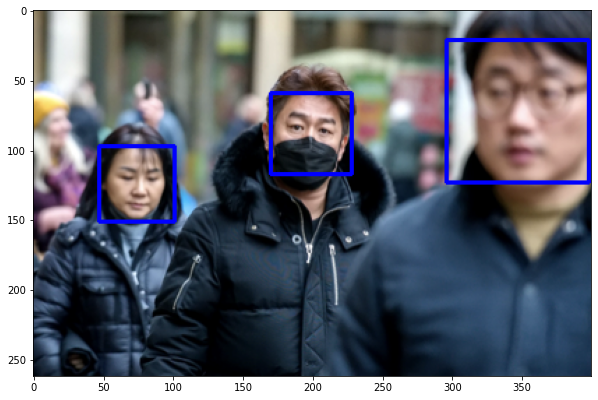

In [6]:
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),2)
plt.figure(figsize=(10,10))
plt.imshow(out_img)

In [31]:
MIN_DISTANCE = 130

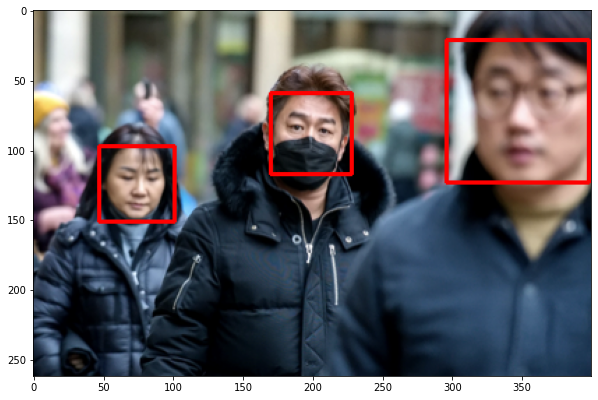

In [8]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),2)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),2)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

In [9]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_dir = 'data/face-mask-12k-images-dataset/Train'
test_dir = 'data/face-mask-12k-images-dataset/Test'
val_dir = 'data/face-mask-12k-images-dataset/Validation'

In [11]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),
                                                  class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,
                                                   target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [12]:
mobilenet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(128,128,3))
for layer in mobilenet.layers:
    layer.trainable = False
model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 20480)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 40962     
Total params: 2,298,946
Trainable params: 40,962
Non-trainable params: 2,257,984
_________________________________________________________________


In [13]:
len(val_generator)/32


0.78125

In [14]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=9,
                              epochs=30,
                              validation_data=val_generator,
                              validation_steps=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
9/9 [==============================] - 6s 675ms/step - loss: 0.3326 - accuracy: 0.8576 - val_loss: 0.0862 - val_accuracy: 0.9375
Epoch 2/30
9/9 [==============================] - 5s 595ms/step - loss: 0.1185 - accuracy: 0.9514 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 3/30
9/9 [==============================] - 5s 595ms/step - loss: 0.0578 - accuracy: 0.9792 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 4/30
9/9 [==============================] - 5s 602ms/step - loss: 0.0337 - accuracy: 0.9792 - val_loss: 0.0516 - val_accuracy: 0.9375
Epoch 5/30
9/9 [==============================] - 4s 495ms/step - loss: 0.0606 - accuracy: 0.9757 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 6/30
9/9 [==============================] - 6s 712ms/step - loss: 0.1032 - accuracy: 0.9792 - val_loss: 0.1349 - val_accuracy: 0.9688
Epoch 7/30
9/9 [==============================] - 10s 1s/step - loss: 0.0292 - accur

In [15]:
model.save('mask.h5')

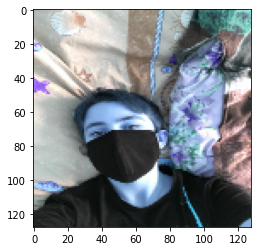

In [27]:
sample_mask_img = cv2.imread('data/face-mask-detection/images/maksssksksss4.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [28]:
model.predict(sample_mask_img)

array([[9.999995e-01, 2.628839e-13]], dtype=float32)

In [29]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

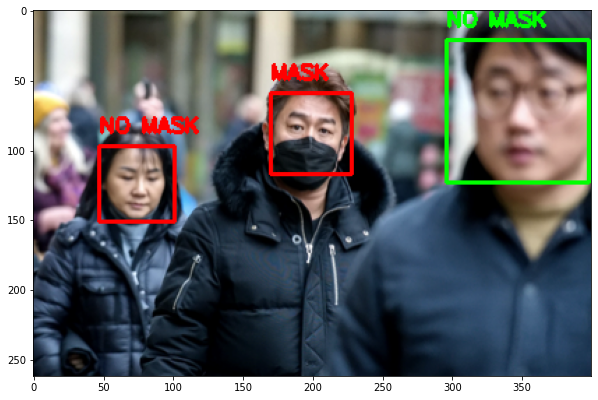

In [32]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],2)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")